<h1><center>Einsatz von Gradientenabstiegsverfahren in Neuronalen Netzen</center></h1> 

# Inhalt

- Grundlagen der Optimierung
- Gradientenabstieg
- Lernen als Optimierung in Neuronalen Netzen
- Gradientenabstieg in Neuronalen Netzen
- Fazit

# Grundlagen der Optimierung


**Optimierungsalgorithmen** sind in der Regel **iterative Verfahren**. 

Ausgehend von einem gegebenen Punkt $ {x_0 \color{red}{+}} $ erzeugen sie eine Folge ${x_k}$ von **Iterierten**, die zu einer Lösung ($\color{red}{\bullet}$) **konvergieren** [2].


<center>![](./optimization.gif)</center>

# Grundlagen der Optimierung
### Optimierung nullter Ordnung
<center>![](./backprop-sketch/opt-types1-notext.png)</center>

# Grundlagen der Optimierung
### Optimierung erster Ordnung
<center>![](./backprop-sketch/opt-types2-notext-single.png)</center>

# Grundlagen der Optimierung
### Optimierung zweiter Ordnung
<center>![](./backprop-sketch/opt-types3-notext-single.png)</center>

# Gradientenabstieg

<center>![](./backprop-sketch/gradient-descent-fig.png)</center>


# Lernen als Optimierung in Neuronale Netzen

Optimierungsalgorithmen helfen uns, eine **Zielfunktion zu minimieren (oder zu maximieren)**. Ein solche Zielfunktion ist in **neuronalen Netzen** eine **mathematische Funktion (E)**, die von den **internen lernbaren Parametern (W)** des Netzwerks abhängt [3].

Diese **Parametern** werden bei der Berechnung der **erwarteten Werte (Y)** aus dem Satz von **Prädiktoren (X)** benutzt. 

**E** beschreibt die Differenz zwischen dem erwarteten Wert und dem **tatsächlichen Netzwerkausgangswert (O)** [1].

<center>![](./backprop-sketch/basic-net.gif)</center>

# Gradientenabstieg in Neuronale Netzen

### Binäre Klassifikation mit neuronalen Netzen

<center>![](./backprop-sketch/hausaufgabe.png)</center>


<center>![](./backprop-sketch/1.gif>)</center>

<center>![](./backprop-sketch/2.gif>)</center>

<center>![](./backprop-sketch/3.gif>)</center>

<center>![](./backprop-sketch/4.gif>)</center>

<center>![](./backprop-sketch/5.gif>)</center>

<center>![](./backprop-sketch/6.gif>)</center>

<center>![](./backprop-sketch/7.gif>)</center>

<center>![](./backprop-sketch/8.gif>)</center>

<center>![](./backprop-sketch/9.gif>)</center>

<center>![](./backprop-sketch/10.gif>)</center>

<center>![](./backprop-sketch/11.gif>)</center>

<center>![](./backprop-sketch/12.gif>)</center>

<center>![](./backprop-sketch/13.gif>)</center>

<center>![](./backprop-sketch/14.gif)</center>

# Implementierung

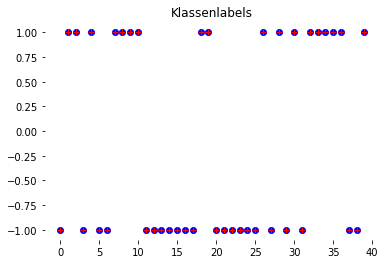

NN AUC=1.000


In [ ]:
# Einfaches neuronales Netz zur binären Klassifikation
import random
import math
import time as t
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

def f(x):
    return math.tanh(x)


def df(x):
    try:
        return 1 / (math.cosh(x) ** 2)
    except OverflowError:
        return 0


class Network:
    

    def __init__(self, l_in, l_hid, l_out, rate=0.05):
        self.num_layer_in = l_in
        self.num_layer_hid = l_hid
        self.num_layer_out = l_out

        self.w1 = []
        self.w2 = []

        # init weights inputs -> hidden
        for i in range(self.num_layer_in * self.num_layer_hid ):
            self.w1.append(random.randrange(-10, 10) * 0.01)

        # init weights hidden -> output
        for i in range(self.num_layer_hid * self.num_layer_out):
            self.w2.append(random.randrange(-10, 10) * 0.01)

        # init weights bias -> hidden
        for i in range(self.num_layer_hid):
            self.w1.append(random.randrange(-10, 10) * 0.01)

        # init weights bias -> output
        for i in range(self.num_layer_out):
            self.w2.append(random.randrange(-10, 10) * 0.01)

        self.learning_rate = rate

    def forward_propagation(self, data_in):
        net_hid = 0
        out_hid = []
        net_out = 0

        # Calculate net input and outputs for hidden layer
        for i in range(self.num_layer_hid):
            net_hid += float(data_in[0]) * self.w1[i]
            net_hid += float(data_in[1]) * self.w1[i + self.num_layer_hid]
            net_hid += self.w1[i + self.num_layer_in * self.num_layer_hid]
            out_hid.append(f(net_hid))

        # Calculate net input and output for output layer
        for i in range(self.num_layer_hid):
            net_out += out_hid[i] * self.w2[i]
        net_out += self.w2[self.num_layer_hid * self.num_layer_out]

        return f(net_out)

    def train(self, train_data):
        for data in train_data:
            net_hid = []
            out_hid = []
            net_out = 0
            out_out = 0

            updates_w1 = []
            updates_w2 = []

            # Calculate net input and outputs for hidden layer
            net = 0
            for i in range(self.num_layer_hid):
                net += float(data[0]) * self.w1[i]
                net += float(data[1]) * self.w1[i + self.num_layer_hid]
                net += self.w1[i + self.num_layer_in * self.num_layer_hid]
                net_hid.append(net)
                out_hid.append(f(net))

            # Calculate net input and output for output layer
            net = 0
            for i in range(self.num_layer_hid):
                net += out_hid[i] * self.w2[i]
            net += self.w2[self.num_layer_hid * self.num_layer_out]
            net_out = net
            out_out = f(net)

            # w2 weights update
            for i in range(len(self.w2)):
                if i < len(self.w2) - self.num_layer_out:
                    update = self.learning_rate * (float(data[2]) - out_out) * df(net_out) * out_hid[i]
                else:
                    update = self.learning_rate * (float(data[2]) - out_out) * df(net_out)
                updates_w2.append(update)

            # w1 weights update
            for i in range(len(self.w1)):
                if i < len(self.w1) - self.num_layer_hid:
                    if i < 4:
                        update = self.learning_rate * (float(data[2]) - out_out) * df(net_out) * self.w2[i % 4] * df(net_hid[i % 4]) * float(data[0])
                    else:
                        update = self.learning_rate * (float(data[2]) - out_out) * df(net_out) * self.w2[i % 4] * df(net_hid[i % 4]) * float(data[1])
                else:
                    update = self.learning_rate * (float(data[2]) - out_out) * df(net_out) * self.w2[i % 4] * df(net_hid[i % 4])
                updates_w1.append(update)

            # update weights w1
            for i, update in enumerate(updates_w1):
                self.w1[i] += update

            # update weights w2
            for i, update in enumerate(updates_w2):
                self.w2[i] += update


def main():
    network = Network(2, 5, 1)
    train_data = []
    f = open('./input_dataset.in')

    try:

        while 1: 
            new_in = f.readline().split(',')
            if len(new_in) < 3:
                break
            train_data.append(new_in)
            

        for _ in range(100):
            network.train(train_data)

        f = open('./testing_dataset.in')
        out_data = []
        test_data = []
        out_data_prob = []
        while 1:
            new_in = f.readline().split(',')
            if len(new_in) < 2:
                break
            new_in[0] = new_in[0][new_in[0].rfind(' ') + 1:]
            new_in[1] = new_in[1][new_in[1].rfind(' ') + 1:]
            output = network.forward_propagation(new_in)
            test_data.append(new_in)
            out_data_prob.append(output)
            if output > 0:
                output = '+1'
            else:
                output = '-1'
            out_data.append(output)
                
        f = open('./expected_dataset.in')
        out_expect_data = []
        while 1:
            new_in = f.readline().split('\n')
            if len(new_in) < 2:
                break
            out_expect_data.append(new_in[0])    

    except EOFError:
        print('', end='')
        
    plt.figure(3)
    plt.plot(out_data, 'bo') 
    plt.plot(out_expect_data,'r+')
    plt.title('Klassenlabels')
    plt.box("off")
    plt.savefig('output-klass.png')
    plt.show()

    # AUC / ROC curves 
    from sklearn.metrics import roc_curve
    from sklearn.metrics import roc_auc_score
    from matplotlib import pyplot
    lr_auc = roc_auc_score(list(map(int, out_expect_data)), out_data_prob)
    # summarize scores
    print('NN AUC=%.3f' % (lr_auc))
    # calculate roc curves
    lr_fpr, lr_tpr, _ = roc_curve(list(map(int, out_expect_data)), out_data_prob)
    # plot the roc curve for the model
    pyplot.plot(lr_fpr, lr_tpr, marker='.', label='ANN')
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    pyplot.savefig('output-roc.png')
    # show the plot
    pyplot.show()

if __name__ == '__main__':
    main()

# Analyse des Gradientenabstiegs


Abhängig von der Datenmenge machen wir einen **Kompromiss zwischen die Genauigkeit der Parameteraktualisierung und der Konvergenzgeschwindigkeit** [2, 4].

# Analyse des Gradientenabstiegs : Genauigkeit

<center>![](./precision.png)</center>

# Analyse des Gradientenabstiegs : Konvergenzgeschwindigkeit

<center>![](./gradient-problems.gif)</center>

# Analyse des Gradientenabstiegs : Konvergenzgeschwindigkeit
<center>![](./demo-anim.gif)</center>


# Fazit

- **Gradientenabstieg** ist die **typische Optimierungsmethode** in neuronalen Netzen.
- **Lernen** in Neuronalen Netzen ist ein **iterativer Prozess**.
- Bei der **Backpropagation** wird ein Gradientenabstieg verwendet, um zu einer **Lösung zu konvergieren** (d. h. die **Gewichte zu finden**), die die **Fehlerfunktion minimiert**.
- **Gradientenabstieg** ist jedoch **problematisch** (Konvergenz, Präzision), aber es wurden viele **verbesserte Verfahren** entwickelt.
- Das **Verständnis des Gradientenabstieg** bei der Diagnose der Backpropagation **ist für erfolgreiche Anwendungen erforderlich**.

# Literaturverzeichnis

[1] https://google-developers.appspot.com/machine-learning/ (letzter Besuch, Dez 2019)

[2] Boyd, S., & Vandenberghe, L. (2004). Convex optimization. Cambridge university press.

[3] Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep learning. MIT press.

[4] Ruder, S. (2016). An overview of gradient descent optimization algorithms. arXiv preprint arXiv:1609.04747.

# Vorlesung Notebook herunterladen

<img src="./qrcode.png" style="width = 200, height=200"/>

# Nachteile des Gradientenabstiegs

Es wurden **verschiedene Methoden entwickelt**, um die Nechteile zum **beheben** [3].

| Gradient Descent | Nesterov Momentum |  Adaptive Moment Estimation (Adam) | 
|:---------:|:---------:|:---------:|
| $ w_{t+1} = w_t - {\alpha} {\nabla E(w_t)}$   |  $ w_{t+1} = w_t - {\alpha} {v_t} \\ { v_{t+1} = \frac{\gamma}{\alpha} v_t  + {\nabla E(w_t - \gamma v_t)}} $  | $ w_{t+1} = w_t -{\alpha} {\frac{m_t}{\sqrt{{v_t}}}}  \\ {m_{t+1} = f(\nabla E(w_t) ) \\ v_{t+1} = f(\nabla E(w_t)^2) }$| 
| $\color{green}{+} $ einfache Aktualisierungsregel (z. B. Summe, Produkt)  | $\color{green}{+}$ Beschleunigt in die jeweilige Steigungsrichtung und dämpft Schwingungen | $\color{green}{+}$ speichert einen exponentiell abfallenden Durchschnitt vergangener Gradienten (glättendes Moment) mit adaptiver Lernrate für jeden parameter |
| $\color{red} {-}$ Konvergiert zum globalen Minimum für konvexe Fehleroberflächen und zu einem lokalen Minimum für nichtkonvexe Oberflächen | $\color{red}{-}$ funktioniert nicht gut, wenn die Kostenfunktionen stark konvex sind | $\color{red}{-}$ hat den niedrigsten Trainingsfehler, aber nicht den niedrigsten Validierungsfehler, und der Validierungsfehler ist größer als der Trainingsfehler (d. h. leichte Überanpassung) |

# Analyse
<center>![](./loss-anim.gif)</center>